# Análisis de la información de 1000 películas de IMDb 

## 1. Introducción 

**Objetivo:**  Explicar el propósito del análisis de la base de datos de IMDb. Este proyecto analiza datos de 1000 películas, enfocado en métricas como ganancias, votos, preferencias de género, y combinaciones de actores y directores, para obtener patrones y tendencias en la industria cinematográfica.

**Descripción del Dataset:** Menciona que el análisis se basa en el archivo IMDB_top_1000v2.csv, destacando que el dataset incluye información sobre títulos, directores, actores, calificaciones, género, ganancias, y que **algunas columnas tienen valores faltantes**, lo cual se abordará en el preprocesamiento.

**Metodología:** Explica que se usaron los **paquetes Pandas, Matplotlib y Seaborn** para el procesamiento y visualización de datos, y que cada pregunta incluye tanto análisis gráfico como explicaciones detalladas.

## 2. Análisis y Respuestas a las Preguntas

### 2.1  Celda inicial: Librerías, configuración, carga y limpieza de datos

In [4]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Configuración para limitar la salida de filas y columnas en pandas
pd.set_option('display.max_rows', 5)     # Muestra un máximo de 5 filas
pd.set_option('display.max_columns', 10) # Muestra un máximo de 10 columnas

# Cargar el dataset
data = pd.read_csv("IMDB_top_1000v2.csv")

# Mostrar solo las primeras 5 filas del dataset
data.head()

# Función para limpieza de datos
def limpiar_datos(df):
    # Ajustar nombres de columnas y eliminar filas con valores nulos en columnas clave
    df = df.dropna(subset=['Director', 'Star1', 'Gross', 'No_of_Votes', 'Genre'])
    return df

# Limpiar el dataset
data = limpiar_datos(data)


### Pregunta 1. Análisis de las ganancias de una película en función de su director

**Análisis:** Este gráfico permite identificar cuáles películas de un director específico han sido más rentables. Al ingresar el nombre de un director, el gráfico muestra las ganancias obtenidas por cada una de sus películas. Este análisis ayuda a entender la consistencia en el éxito financiero del director y permite comparar sus películas según su rendimiento económico.

**Documentación Interna:** Permite visualizar las ganancias de todas las películas de un director específico mediante un gráfico de barras. El usuario introduce el nombre del director y la función muestra las ganancias de cada película dirigida por esa persona.

Ingrese el nombre de un director para ver sus ganancias promedio:  Anthony Russo


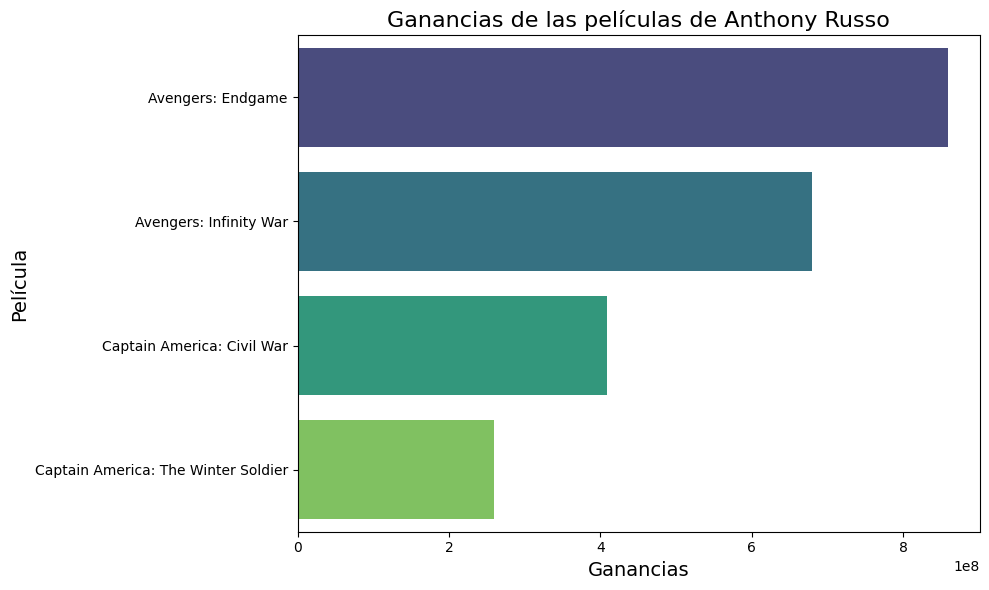

In [11]:
# 1. Análisis de las ganancias de una película en función de su director 
def ganancias_por_director(df):
    director = input("Ingrese el nombre de un director para ver sus ganancias promedio: ")
    director_data = df[df['Director'] == director]
    if director_data.empty:
        print("No se encontraron datos para el director ingresado.")
    else:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=director_data['Gross'], y=director_data['Series_Title'], palette="viridis")
        plt.title(f"Ganancias de las películas de {director}", fontsize=16)
        plt.xlabel("Ganancias", fontsize=14)
        plt.ylabel("Película", fontsize=14)
        plt.tight_layout()
        plt.show()
ganancias_por_director(data)

### Pregunta 2. Análisis de las ganancias de una película en función de los actores en la misma

**Análisis:** Este análisis permite observar las ganancias promedio de las películas de un actor específico. Al seleccionar un actor, el gráfico muestra las películas en las que ha participado y las ganancias de cada una. Esto facilita evaluar la popularidad y rentabilidad del actor en términos financieros, identificando qué títulos destacan en su carrera y en qué medida contribuye al éxito económico de una película.

**Documentación Interna:** Busca las películas donde el actor aparece (ya sea como Star1, Star2, Star3 o Star4) y muestra las ganancias de cada una en un gráfico de barras.

Ingrese el nombre de un actor para ver sus ganancias promedio:  Chris Evans


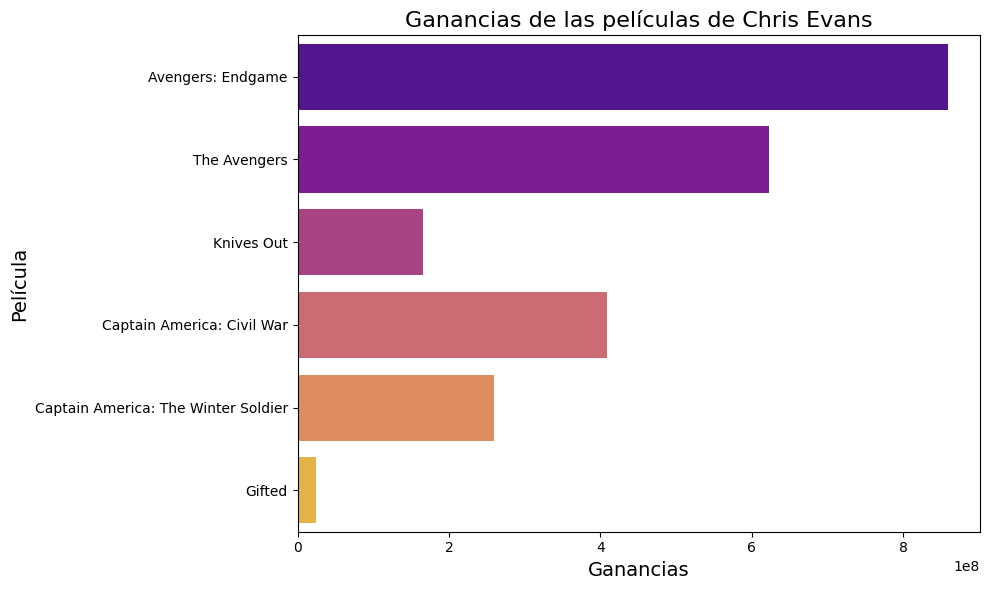

In [14]:
# 2. Análisis de las ganancias de una película en función de los actores en la misma 
def ganancias_por_actor(df):
    actor = input("Ingrese el nombre de un actor para ver sus ganancias promedio: ")
    actor_data = df[(df['Star1'] == actor) | (df['Star2'] == actor) | (df['Star3'] == actor) | (df['Star4'] == actor)]
    if actor_data.empty:
        print("No se encontraron datos para el actor ingresado.")
    else:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=actor_data['Gross'], y=actor_data['Series_Title'], palette="plasma")
        plt.title(f"Ganancias de las películas de {actor}", fontsize=16)
        plt.xlabel("Ganancias", fontsize=14)
        plt.ylabel("Película", fontsize=14)
        plt.tight_layout()
        plt.show()

ganancias_por_actor(data)

### Pregunta 3. Análisis del número de votos de una película en función de su director

**Análisis:** Este gráfico presenta el número promedio de votos de IMDb para las películas de un director específico. Al seleccionar un director, se muestra el interés y la aprobación que el público ha dado a sus películas, lo cual es un indicador de su popularidad y relevancia en la industria. Un mayor número de votos generalmente refleja una mayor popularidad y visibilidad de las películas del director.

**Documentación Interna:** Visualiza el número de votos recibidos en IMDb para cada película de un director específico. Ayuda a entender la popularidad de las películas de cada director.

Ingrese el nombre de un director para ver el promedio de votos de sus películas:  Anthony Russo


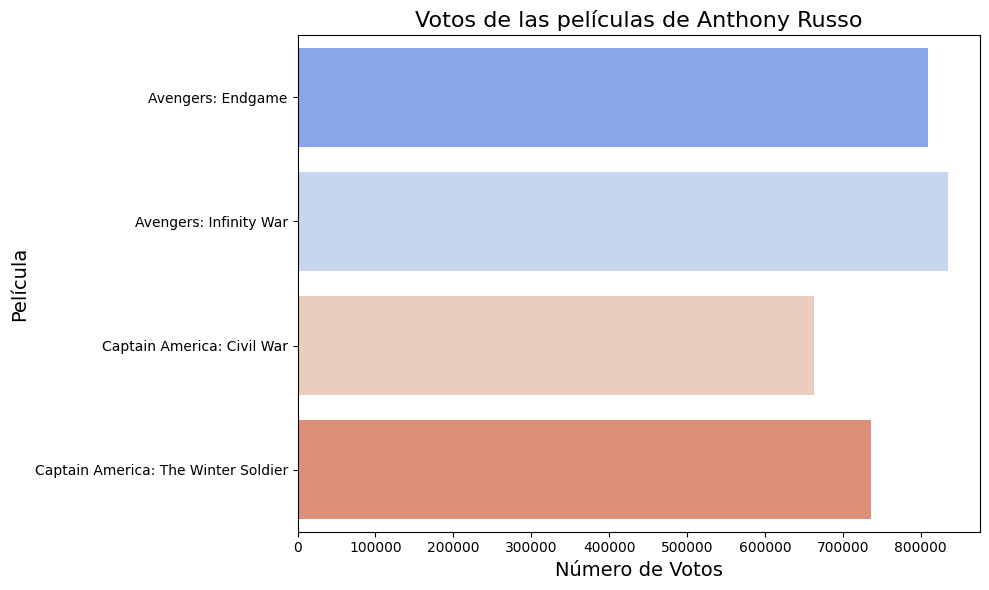

In [15]:
# 3. Análisis del número de votos de una película en función de su director
def votos_por_director(df):
    director = input("Ingrese el nombre de un director para ver el promedio de votos de sus películas: ")
    director_data = df[df['Director'] == director]
    if director_data.empty:
        print("No se encontraron datos para el director ingresado.")
    else:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=director_data['No_of_Votes'], y=director_data['Series_Title'], palette="coolwarm")
        plt.title(f"Votos de las películas de {director}", fontsize=16)
        plt.xlabel("Número de Votos", fontsize=14)
        plt.ylabel("Película", fontsize=14)
        plt.tight_layout()
        plt.show()

votos_por_director(data)

### Pregunta 4. Análisis del número de votos de una película en función de los actores en la misma

**Análisis:** Este gráfico muestra el número promedio de votos de IMDb para las películas en las que ha participado un actor específico. Al seleccionar un actor, se observa el nivel de aceptación y relevancia de sus películas según el público. Este análisis permite ver cómo el actor ha impactado en términos de popularidad y qué tan frecuentes son las altas calificaciones en sus películas.

**Documentación Interna:** Muestra el número de votos en IMDb para todas las películas en las que participa un actor específico, permitiendo ver qué películas del actor fueron más populares.

In [ ]:
# 4. Análisis del número de votos de una película en función de los actores en la misma (Intervención del usuario)
def votos_por_actor(df):
    actor = input("Ingrese el nombre de un actor para ver el promedio de votos de sus películas: ")
    actor_data = df[(df['Star1'] == actor) | (df['Star2'] == actor) | (df['Star3'] == actor) | (df['Star4'] == actor)]
    if actor_data.empty:
        print("No se encontraron datos para el actor ingresado.")
    else:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=actor_data['No_of_Votes'], y=actor_data['Series_Title'], palette="magma")
        plt.title(f"Votos de las películas de {actor}", fontsize=16)
        plt.xlabel("Número de Votos", fontsize=14)
        plt.ylabel("Película", fontsize=14)
        plt.tight_layout()
        plt.show()

votos_por_actor(data)

### Pregunta 5. ¿Cuál actor prefiere cuál género?

**Análisis:** Este análisis general examina las preferencias de género de los actores. Para cada actor, el género en el que ha participado con mayor frecuencia se muestra en el resultado. Esto ofrece una visión de la especialización de cada actor en ciertos géneros, como comedia, drama, acción, etc. Ayuda a entender cómo los actores se inclinan hacia ciertos tipos de películas y cómo esto podría impactar en sus carreras y en la percepción del público.

**Documentación Interna:** 
Crea un gráfico de barras apiladas que muestra los géneros más frecuentes en los que trabajan los actores más prolíficos. Visualiza los top 10 actores y los 5 géneros más comunes.

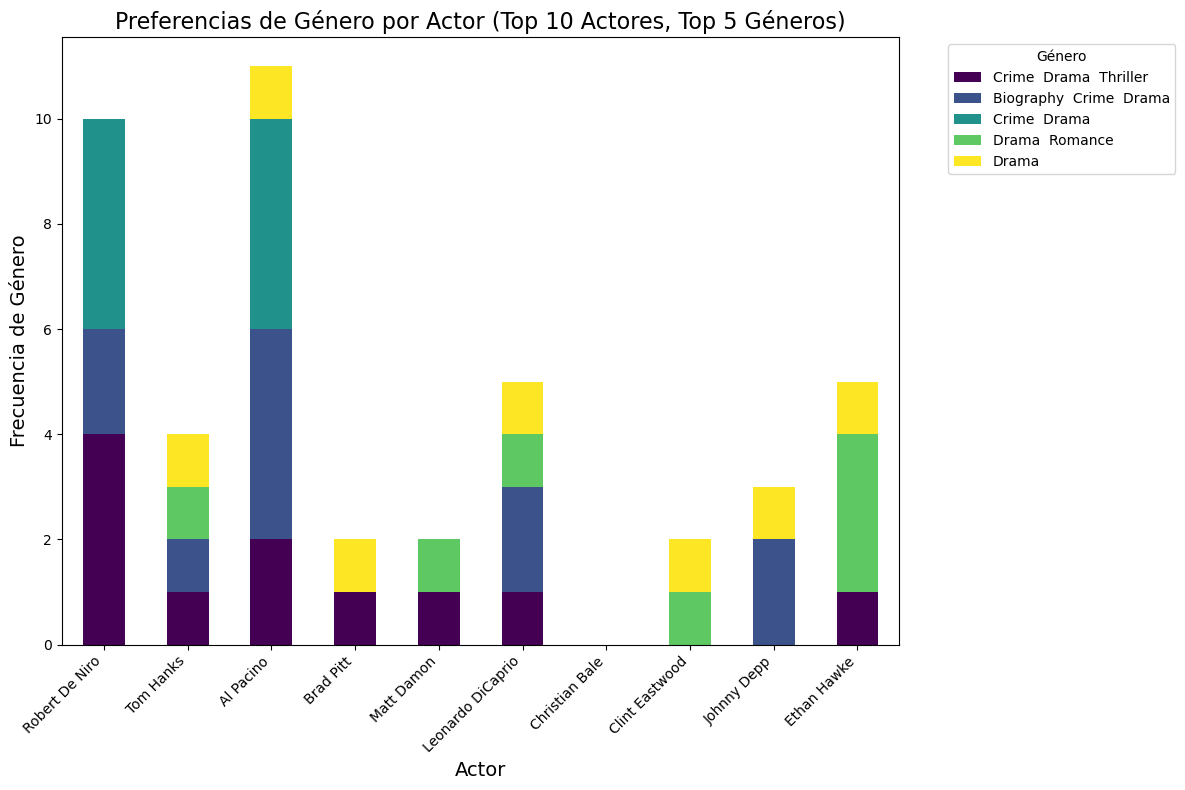

In [6]:
# 5. ¿Cuál actor prefiere cuál género? (Gráfico de barras apiladas)
def genero_preferido_por_actor_barras(df, top_n=10, top_genres=5):
    # Crear una lista con todos los actores de cada película, una fila por actor y género
    actores_genero = df.melt(
        id_vars=['Genre'],
        value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
        var_name='StarPosition', 
        value_name='Actor'
    )
    
    # Contar la frecuencia de cada género por actor
    actor_genero = actores_genero.groupby(['Actor', 'Genre']).size().unstack(fill_value=0)
    
    # Seleccionar los actores con más apariciones
    top_actors = actor_genero.sum(axis=1).sort_values(ascending=False).head(top_n).index
    actor_genero_top = actor_genero.loc[top_actors]
    
    # Seleccionar los géneros más frecuentes para simplificar el gráfico
    top_genres = actor_genero_top.sum(axis=0).sort_values(ascending=False).head(top_genres).index
    actor_genero_top = actor_genero_top[top_genres]
    
    # Crear el gráfico de barras apiladas
    ax = actor_genero_top.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="viridis")
    plt.title("Preferencias de Género por Actor (Top 10 Actores, Top 5 Géneros)", fontsize=16)
    plt.xlabel("Actor", fontsize=14)
    plt.ylabel("Frecuencia de Género", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# limitando a los 10 actores más frecuentes y los 5 géneros más populares para una mejor visualización del top 10
genero_preferido_por_actor_barras(data, top_n=10, top_genres=5)

### Pregunta 6. ¿Cuál combinación de actores obtiene buenos ratings más a menudo?

**Análisis:** En este gráfico se muestra el promedio de calificaciones de IMDb para combinaciones de actores. La calificación promedio ayuda a identificar las combinaciones de actores que han sido mejor recibidas por el público y la crítica. Este análisis es valioso para observar si existen “parejas” de actores que regularmente contribuyen al éxito de las películas en las que participan, tanto en términos de crítica como de popularidad.

**Documentación Interna:** Analiza qué combinaciones de 4 actores obtienen las mejores calificaciones promedio en IMDb, mostrando las 10 mejores combinaciones.

In [ ]:

# 6. ¿Cuál combinación de actores obtiene buenos ratings más a menudo?
def combinacion_actores_mejores_ratings(df):
    df['Actors'] = df['Star1'] + ", " + df['Star2'] + ", " + df['Star3'] + ", " + df['Star4']
    actor_combos = df.groupby('Actors')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=actor_combos.values, y=actor_combos.index, palette="cubehelix", dodge=False)
    plt.title("Combinación de Actores con Mejores Ratings", fontsize=16)
    plt.xlabel("Rating Promedio", fontsize=14)
    plt.ylabel("Combinación de Actores", fontsize=14)
    plt.tight_layout()
    plt.show()

combinacion_actores_mejores_ratings(data)

### Pregunta 7.¿Cuál combinación de actores obtiene las máximas ganancias?

**Análisis:** Este análisis examina las combinaciones de actores que obtienen mayores ganancias promedio en sus películas. Al revisar el promedio de ingresos para las combinaciones de actores, se pueden identificar las duplas o grupos de actores que, cuando participan juntos, tienen un gran impacto en la taquilla. Este tipo de análisis es crucial para comprender la sinergia entre actores y su efecto en el rendimiento financiero de una película.

**Documenatción Interna:** enfocada en ganancias. Muestra las 10 combinaciones de actores que generan mayores ingresos en promedio.

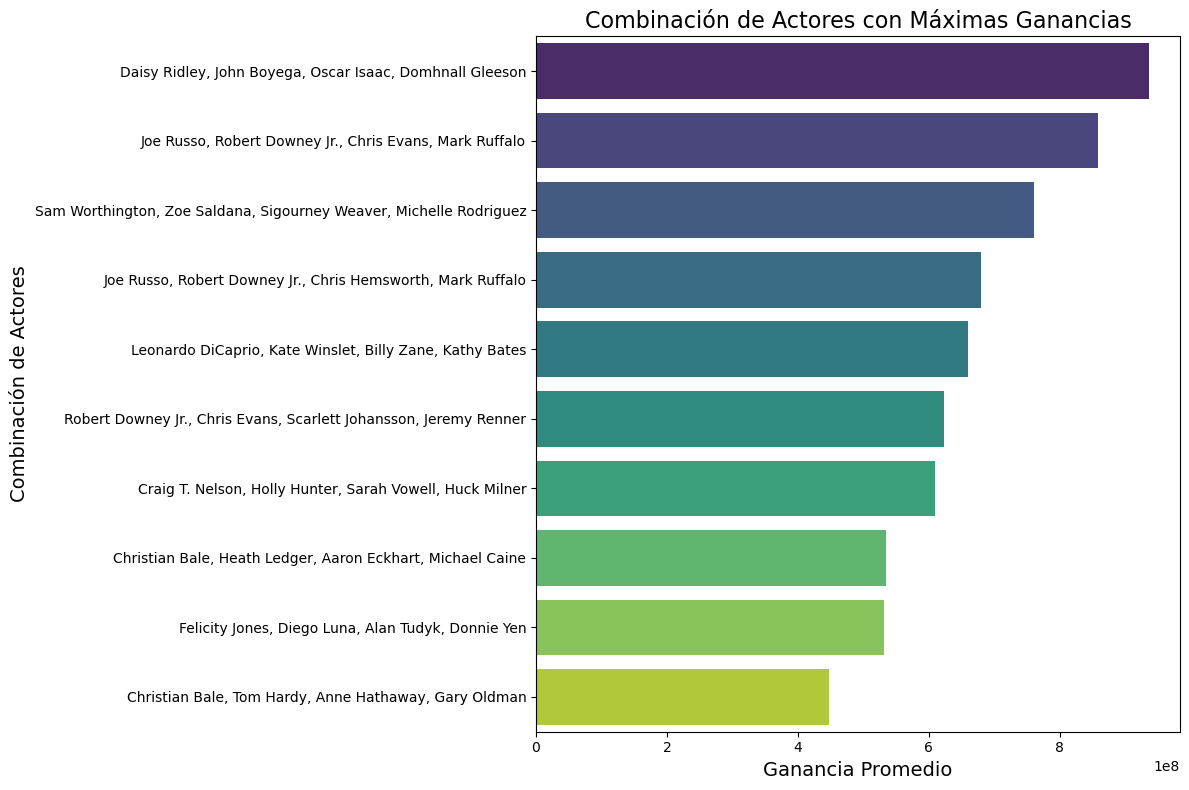

In [24]:
# 7. ¿Cuál combinación de actores obtiene las máximas ganancias?
def combinacion_actores_mayor_ganancia(df):
    df['Actors'] = df['Star1'] + ", " + df['Star2'] + ", " + df['Star3'] + ", " + df['Star4']
    actor_combos_ganancias = df.groupby('Actors')['Gross'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=actor_combos_ganancias.values, y=actor_combos_ganancias.index, palette="viridis", dodge=False)
    plt.title("Combinación de Actores con Máximas Ganancias", fontsize=16)
    plt.xlabel("Ganancia Promedio", fontsize=14)
    plt.ylabel("Combinación de Actores", fontsize=14)
    plt.tight_layout()
    plt.show()

combinacion_actores_mayor_ganancia(data)

### Pregunta 8. Análisis del género de las películas en función de las ganancias obtenidas

**Análisis:** Este gráfico muestra las ganancias promedio por género de película. Al observar las ganancias en función del género, se identifica cuáles tipos de películas tienden a ser más rentables en términos de ingresos. Esto permite entender qué géneros son más populares y exitosos, proporcionando información relevante para la toma de decisiones en la producción cinematográfica y para comprender las preferencias del público.

**Documentación Interna:** Analiza qué géneros de películas son más rentables, mostrando las ganancias promedio por género en un gráfico de barras.

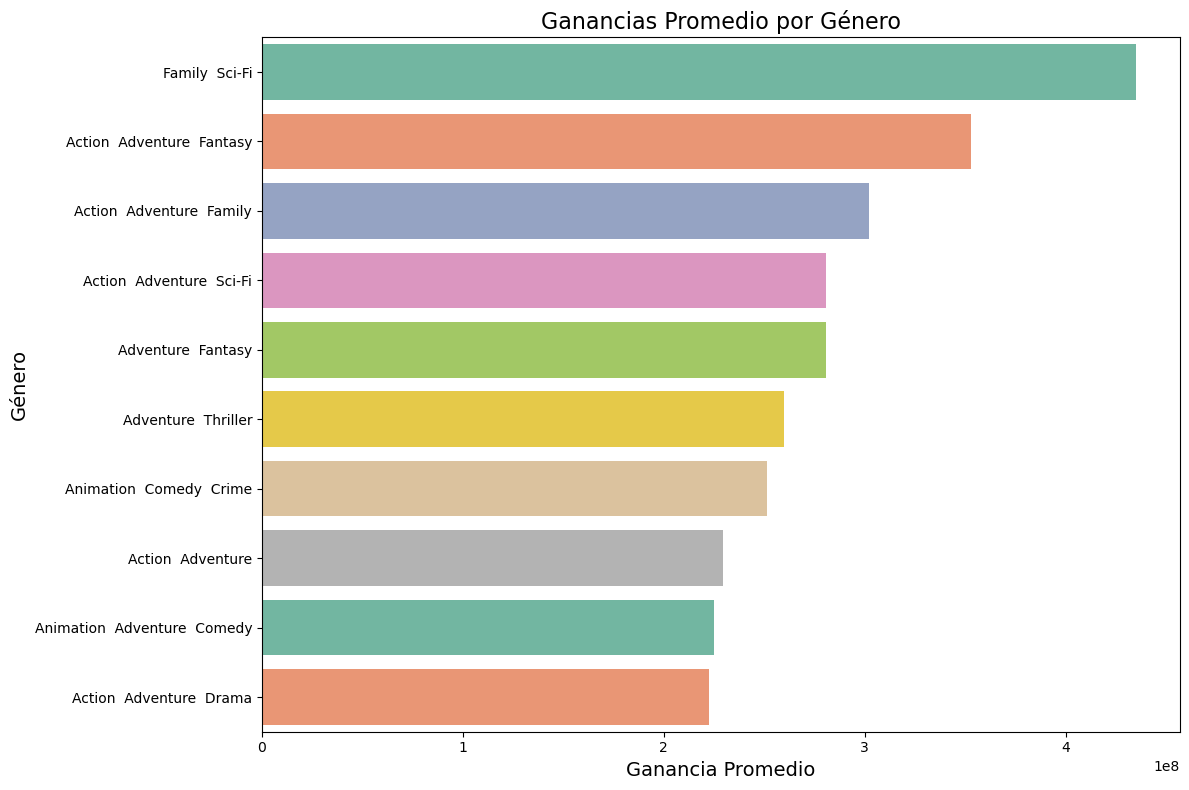

In [21]:
# 8. Análisis del género de las películas en función de las ganancias obtenidas
def genero_por_ganancias(df):
    genero_ganancias = df.groupby('Genre')['Gross'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=genero_ganancias.values, y=genero_ganancias.index, palette="Set2", dodge=False)
    plt.title("Ganancias Promedio por Género", fontsize=16)
    plt.xlabel("Ganancia Promedio", fontsize=14)
    plt.ylabel("Género", fontsize=14)
    plt.tight_layout()
    plt.show()

genero_por_ganancias(data)

### Pregunta 9. ¿Cuál es la distribución porcentual de las películas por género y por década?

**Análisis:** Este análisis examina cómo se distribuyen los géneros de películas a lo largo de las décadas. La distribución porcentual permite observar la evolución en la popularidad de distintos géneros a lo largo del tiempo. Este análisis es útil para entender las tendencias cambiantes en los gustos del público y cómo estas tendencias han moldeado la producción cinematográfica en cada década.

**Documentación Interna:** Visualiza cómo ha evolucionado la distribución de géneros cinematográficos a lo largo de las décadas, mostrando el porcentaje de cada género por década.

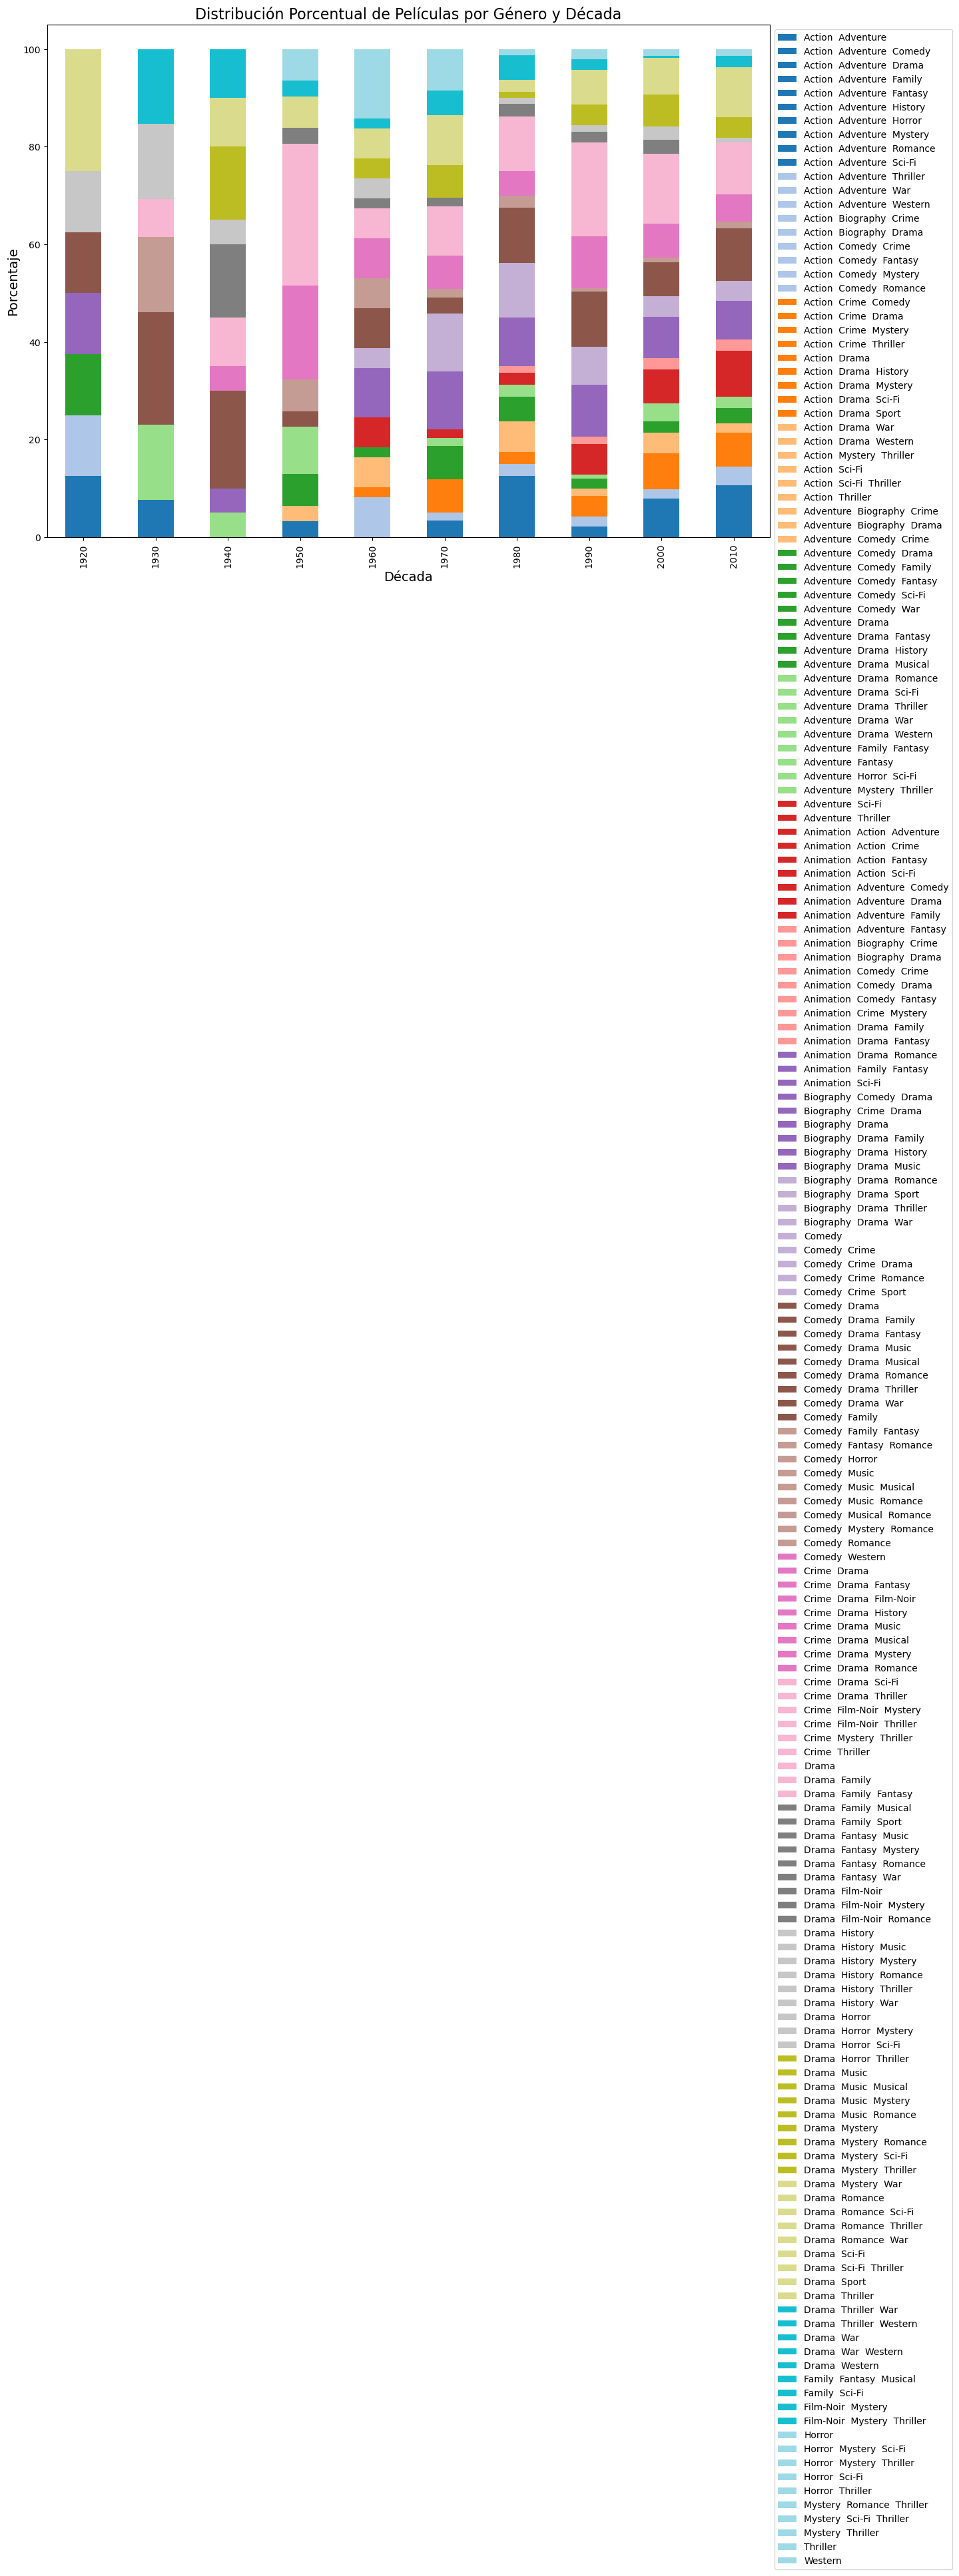

In [20]:
# 9. ¿Cuál es la distribución porcentual de las películas por género y por década?
def distribucion_por_genero_decada(df):
    df['Decade'] = (df['Released_Year'] // 10) * 10
    genero_decada = df.groupby(['Decade', 'Genre']).size().unstack().fillna(0)
    genero_decada_percentage = genero_decada.apply(lambda x: x / x.sum() * 100, axis=1)
    genero_decada_percentage.plot(kind="bar", stacked=True, figsize=(14, 10), colormap="tab20")
    plt.title("Distribución Porcentual de Películas por Género y Década", fontsize=16)
    plt.xlabel("Década", fontsize=14)
    plt.ylabel("Porcentaje", fontsize=14)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
    plt.tight_layout()
    plt.show()

distribucion_por_genero_decada(data)


### Pregunta 10. ¿Cuáles son las 10 películas más rentables por minuto?

**Análisis:** Este gráfico muestra las películas que generan la mayor cantidad de ingresos por minuto de duración. Las películas más rentables por minuto destacan por su alta eficiencia en términos de ganancia, ya que logran altos ingresos en un tiempo relativamente corto. Este análisis puede revelar el éxito de ciertas producciones de bajo presupuesto o de duración reducida que, sin embargo, han logrado captar una gran cantidad de ingresos en poco tiempo.

**Documentación Interna:** Identifica qué películas generan más ingresos por minuto de duración, dividiendo las ganancias totales entre la duración de la película.

In [ ]:
# 10. ¿Cuáles son las 10 películas más rentables por minuto?
def peliculas_mas_rentables_por_minuto(df):
    df['Revenue_per_minute'] = df['Gross'] / df['Runtime']
    rentables_por_minuto = df.sort_values(by='Revenue_per_minute', ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=rentables_por_minuto['Revenue_per_minute'], y=rentables_por_minuto['Series_Title'], palette="summer")
    plt.title("Top 10 Películas Más Rentables por Minuto", fontsize=16)
    plt.xlabel("Ganancia por Minuto", fontsize=14)
    plt.ylabel("Título", fontsize=14)
    plt.tight_layout()
    plt.show()

peliculas_mas_rentables_por_minuto(data)

## Preguntas Extra

### Pregunta Extra 1: ¿Cuál es la calificación promedio de las películas de un director específico?

**Objetivo:** Analizar cómo han sido recibidas en promedio las películas de un director específico, basándose en las calificaciones de IMDb.

**Análisis:** Este análisis permite observar la calificación promedio de las películas de un director, lo cual refleja la percepción general del público y la crítica sobre su obra. Una calificación alta promedio podría indicar que las películas de este director han sido consistentemente bien recibidas, mientras que una calificación baja podría indicar una recepción mixta o negativa. Esto ayuda a identificar la calidad percibida de las producciones de cada director según los espectadores.

**Documentación Interna:** Calcula y muestra la calificación promedio de IMDb para todas las películas de un director específico.

In [32]:
def calificacion_promedio_por_director(df):
    director = input("Ingrese el nombre de un director para ver la calificación promedio de sus películas: ")
    director_data = df[df['Director'] == director]
    if director_data.empty:
        print("No se encontraron películas para el director ingresado.")
    else:
        promedio_calificacion = director_data['IMDB_Rating'].mean()
        print(f"La calificación promedio para las películas de {director} es: {promedio_calificacion:.2f}")

calificacion_promedio_por_director(data)


Ingrese el nombre de un director para ver la calificación promedio de sus películas:  Anthony Russo


La calificación promedio para las películas de Anthony Russo es: 8.08


### Pregunta Extra 2: ¿Cuál es el género con mayor promedio de calificación en IMDb?

**Objetivo:** Determinar cuál género de películas tiene el promedio de calificación más alto, lo que indica los géneros mejor valorados en general.

**Análisis:** Este análisis muestra qué géneros tienen las mejores calificaciones promedio en IMDb. Esto puede revelar patrones interesantes en las preferencias del público y la crítica hacia ciertos géneros. Un alto promedio de calificación en un género específico sugiere que las películas de este género suelen ser bien valoradas por su calidad, lo cual puede influir en las decisiones de los cineastas y estudios al escoger los géneros de sus próximas producciones.

**Documentación Interna:** Muestra qué géneros tienen las mejores calificaciones promedio en IMDb, ayudando a identificar los géneros más apreciados por los usuarios.

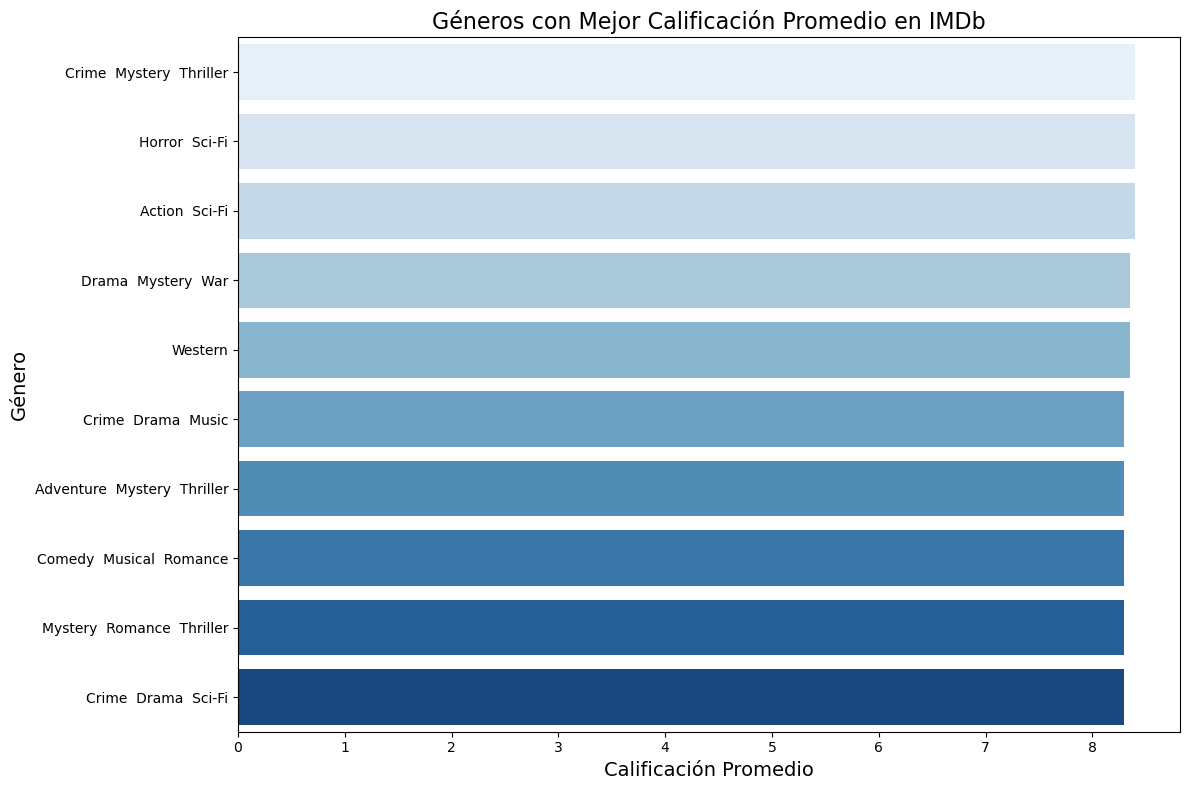

In [38]:
def genero_mejor_calificacion(df):
    genero_calificacion = df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=genero_calificacion.values, y=genero_calificacion.index, palette="Blues")
    plt.title("Géneros con Mejor Calificación Promedio en IMDb", fontsize=16)
    plt.xlabel("Calificación Promedio", fontsize=14)
    plt.ylabel("Género", fontsize=14)
    plt.tight_layout()
    plt.show()

genero_mejor_calificacion(data)


### Pregunta Extra 3: ¿Cuáles son las 10 películas más populares en términos de número de votos?

**Objetivo:** Identificar las películas que han recibido la mayor cantidad de votos en IMDb, lo cual refleja su popularidad y alcance.

**Análisis:** El número de votos en IMDb puede ser un buen indicador de la popularidad de una película. Las películas con más votos tienden a tener un alcance mayor y han sido vistas por un gran número de personas. Este análisis permite identificar las películas más populares entre los usuarios de IMDb y ayuda a entender qué títulos han tenido un impacto cultural significativo, atrayendo a un público amplio y diverso.

**Documentación Interna:** Identifica las 10 películas que han recibido más votos en IMDb, lo que puede indicar su popularidad general entre los espectadores.

In [ ]:
def peliculas_mas_votadas(df):
    peliculas_votadas = df.sort_values(by='No_of_Votes', ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=peliculas_votadas['No_of_Votes'], y=peliculas_votadas['Series_Title'], palette="magma")
    plt.title("Top 10 Películas Más Populares por Número de Votos", fontsize=16)
    plt.xlabel("Número de Votos", fontsize=14)
    plt.ylabel("Título de la Película", fontsize=14)
    plt.tight_layout()
    plt.show()

peliculas_mas_votadas(data)


## Conclusiones

En este proyecto de análisis de datos de películas, se exploraron diferentes aspectos que contribuyen al éxito y popularidad de una película. Desde el análisis de las ganancias en función del director y los actores hasta la distribución de géneros y combinaciones de actores, los resultados proporcionan una visión amplia sobre los factores que influyen en la rentabilidad y el impacto de una película.

**Resumen de Hallazgos:**

**Directores y Actores:** Se observó que ciertos directores y actores tienen una influencia significativa en las ganancias y el éxito de sus películas. Al centrarse en estos aspectos, se identificaron patrones de popularidad y éxito financiero, mostrando cómo figuras específicas pueden contribuir a la atracción del público.

**Géneros:** Los géneros de películas también muestran variaciones en su popularidad y rentabilidad. Algunos géneros, como el drama o la acción, tienden a tener mayores ganancias promedio, mientras que otros géneros experimentan fluctuaciones en su atractivo para el público.
Sinergia entre Actores: Las combinaciones de actores con altos ratings y ganancias promedio reflejan el valor de la química en pantalla y cómo puede elevar la popularidad de una película. Estos resultados son valiosos para estudios de producción en la toma de decisiones sobre el elenco.

**Limitaciones:** El dataset utilizado tiene algunas limitaciones, tales como valores faltantes en ciertas columnas, lo cual puede afectar la precisión de ciertos análisis. Además, se debe considerar el sesgo potencial, ya que el conjunto de datos solo cubre un número limitado de películas populares, lo que puede no representar completamente la industria cinematográfica en su totalidad.

Este análisis proporciona una base sólida para comprender las dinámicas de la industria del cine y puede ser una herramienta útil tanto para profesionales en el campo de la producción como para investigadores interesados en estudiar el comportamiento de los consumidores de entretenimiento. La información obtenida es relevante para decisiones estratégicas en la industria, como la selección de elencos, elección de géneros y combinación de actores, maximizando así el potencial de éxito de futuras producciones cinematográficas.